# Ejercicios 4.1.1 y 4.1.2

In [1]:
# Se incluyen librerias
from PIL import Image
from matplotlib import pyplot as plt
from skimage import io
import pandas as pd
import cv2
import os
import numpy as np
import math

In [2]:
directorio = 'imagenes/'

In [3]:
# Lista de nombres de archivos
files = ['house.tif',
         'rosa800x600.raw',
         'cameraman.tif',
         'peppers_color.tif',
         'lake.tif',
         'lena_color_512.tif', 
         'Anonymized20200210.dcm']

## 4.1.1 Leer y desplegar imagenes

#### Utilizando Matplotlib

In [4]:
infoPlt = {}
imgPlt = []
for name in files:
    infoPlt[name] = {'Tipo de imagen':None,
                    'Tamaño':None, 
                    'Datos de imagen':None,
                    'Tipo de dato':None}
    try:
        im = plt.imread(directorio+name)
        imgPlt += [im]
        # Obtiene el tipo de imagen
        if len(im.shape) > 2 and im.shape[-1] == 4:
            infoPlt[name]['Tipo de imagen'] = 'RGBA' 
        elif len(im.shape) > 2 and im.shape[-1] == 3:
            infoPlt[name]['Tipo de imagen'] ='RGB'
        elif len(im.shape) > 2 and im.shape[-1] == 2:
            infoPlt[name]['Tipo de imagen'] ='LA'
        else:
            infoPlt[name]['Tipo de imagen'] = 'Grayscale'
        # Se obtiene el tamaño de imagen
        infoPlt[name]['Tamaño'] = im.shape
        # Se obtiene el tipo de contenedor de datos de la imagen
        infoPlt[name]['Datos de imagen'] = type(im)
        # Se obtiene el tipo de dato del contenedor
        infoPlt[name]['Tipo de dato'] = im.dtype
    except OSError:
        infoPlt[name]['Tipo de imagen'] = "No se puede leer"
infoPlt = pd.DataFrame.from_dict(infoPlt).transpose()

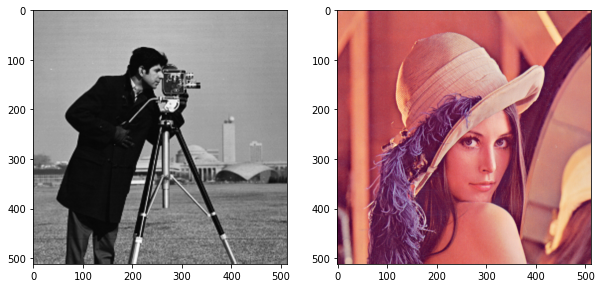

In [5]:
# Despliege de imagenes
f, axarr = plt.subplots(1,2,figsize=(10,10)) 
axarr[0].imshow(imgPlt[0], cmap='gray');
axarr[1].imshow(imgPlt[1]);

#### Utilizando PIL

In [6]:
infoPIL = {}
imgPIL = []
for name in files:
    infoPIL[name] = {'Tipo de imagen':None,
                    'Tamaño':None, 
                    'Datos de imagen':None,
                    'Tipo de dato':None}
    try:
        im = Image.open(directorio+name)
        imgPIL += [im]
        # Obtiene el tipo de imagen
        infoPIL[name]['Tipo de imagen'] = im.mode
        # Se obtiene el tamaño de imagen
        infoPIL[name]['Tamaño'] = im.size
        # Se obtiene el tipo de contenedor de datos de la imagen
        infoPIL[name]['Datos de imagen'] = type(im)
        # Se obtiene el tipo de dato del contenedor
        infoPIL[name]['Tipo de dato'] = im.mode
    except:
        infoPIL[name]['Tipo de imagen'] = "No se puede leer"
infoPIL = pd.DataFrame.from_dict(infoPIL).transpose()

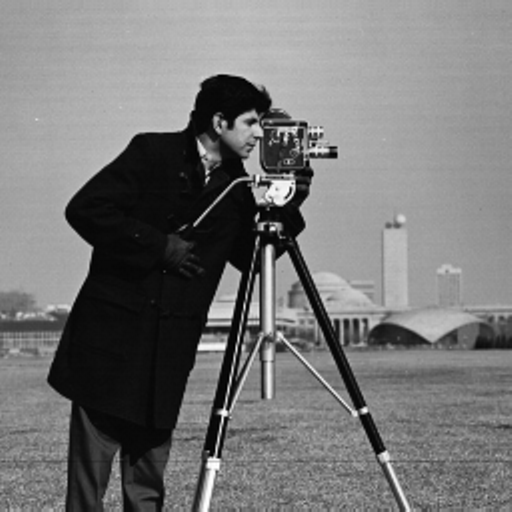

In [7]:
# Despliege de imagenes
imgPIL[0]

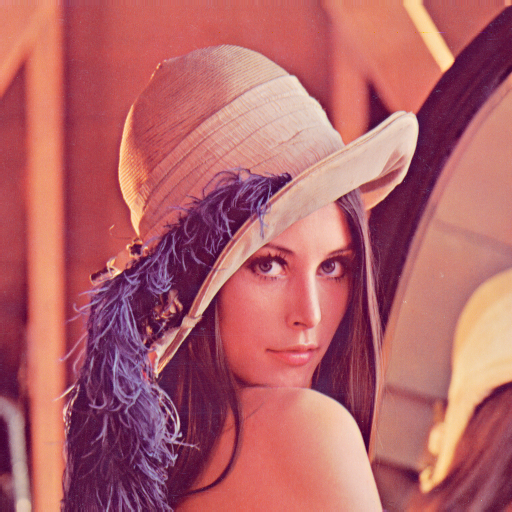

In [8]:
# Despliege de imagenes
imgPIL[1]

#### Utilizando OpenCV

In [9]:
infoCV2 = {}
imgCV2 = []
for name in files:
    infoCV2[name] = {'Tipo de imagen':None,
                    'Tamaño':None, 
                    'Datos de imagen':None,
                    'Tipo de dato':None}
    try:
        im = cv2.imread(directorio+name)
        # Obtiene el tipo de imagen
        if len(im.shape) > 2:
            infoCV2[name]['Tipo de imagen'] = 'RGB' if im.shape[-1] == 3 else 'RGBA'
        else:
            imgCV2[name]['Tipo de imagen'] = 'Grayscale'
        imgCV2 += [im]
        # Se obtiene el tamaño de imagen
        infoCV2[name]['Tamaño'] = im.shape
        # Se obtiene el tipo de contenedor de datos de la imagen
        infoCV2[name]['Datos de imagen'] = type(im)
        # Se obtiene el tipo de dato del contenedor
        infoCV2[name]['Tipo de dato'] = im.dtype
    except:
        infoCV2[name]['Tipo de imagen'] = "No se puede leer"
infoCV2 = pd.DataFrame.from_dict(infoCV2).transpose()

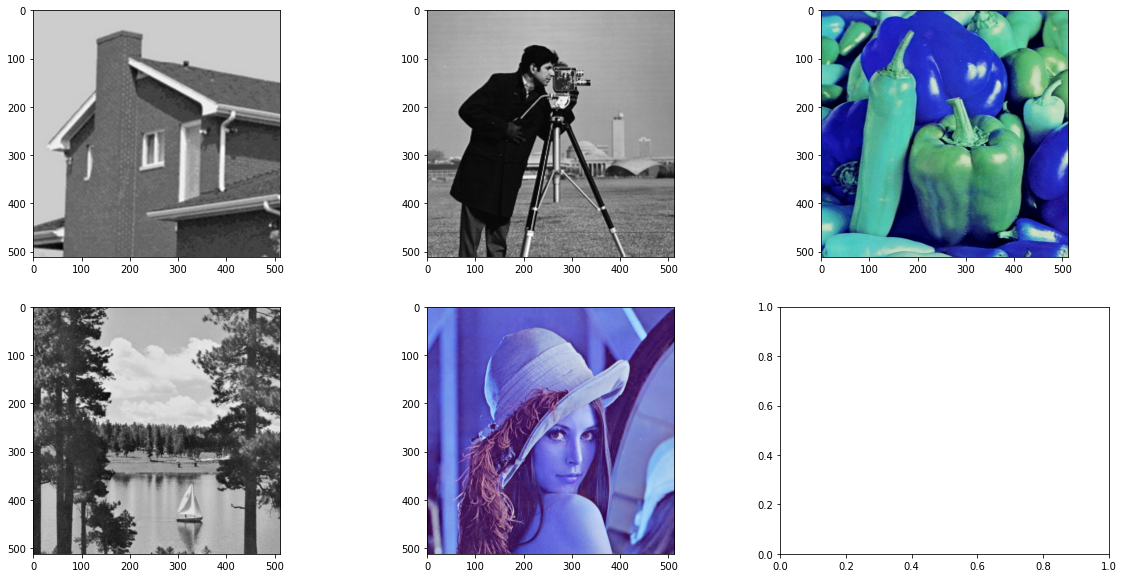

In [10]:
# Despliege de imagenes
f, axarr = plt.subplots(2,3,figsize=(20,10)) 
# use the created array to output your multiple images.
axarr[0,0].imshow(imgCV2[0]);
axarr[0,1].imshow(imgCV2[1]);
axarr[0,2].imshow(imgCV2[2]);
axarr[1,0].imshow(imgCV2[3]);
axarr[1,1].imshow(imgCV2[4]);

#### Utilizando Sckit-Image

In [11]:
infoSckit = {}
imgSckit = []
for name in files:
    infoSckit[name] = {'Tipo de imagen':None,
                       'Tamaño':None, 
                       'Datos de imagen':None,
                       'Tipo de dato':None}
    try:
        im = io.imread(directorio+name)
        imgSckit += [im]
        # Obtiene el tipo de imagen
        if len(im.shape) > 2 and im.shape[-1] == 4:
            infoSckit[name]['Tipo de imagen'] = 'RGBA' 
        elif len(im.shape) > 2 and im.shape[-1] == 3:
            infoSckit[name]['Tipo de imagen'] ='RGB'
        elif len(im.shape) > 2 and im.shape[-1] == 2:
            infoSckit[name]['Tipo de imagen'] ='Gray+Alpha'
        else:
            infoSckit[name]['Tipo de imagen'] = 'Grayscale'
        # Se obtiene el tamaño de imagen
        infoSckit[name]['Tamaño'] = im.shape
        # Se obtiene el tipo de contenedor de datos de la imagen
        infoSckit[name]['Datos de imagen'] = type(im)
        # Se obtiene el tipo de dato del contenedor
        infoSckit[name]['Tipo de dato'] = im.dtype
    except:
        infoSckit[name]['Tipo de imagen'] = "No se puede leer"
infoSckit = pd.DataFrame.from_dict(infoSckit).transpose()

TiffTag 338: 999 is not a valid TIFF.EXTRASAMPLE
TiffTag 338: 999 is not a valid TIFF.EXTRASAMPLE
TiffTag 338: 999 is not a valid TIFF.EXTRASAMPLE


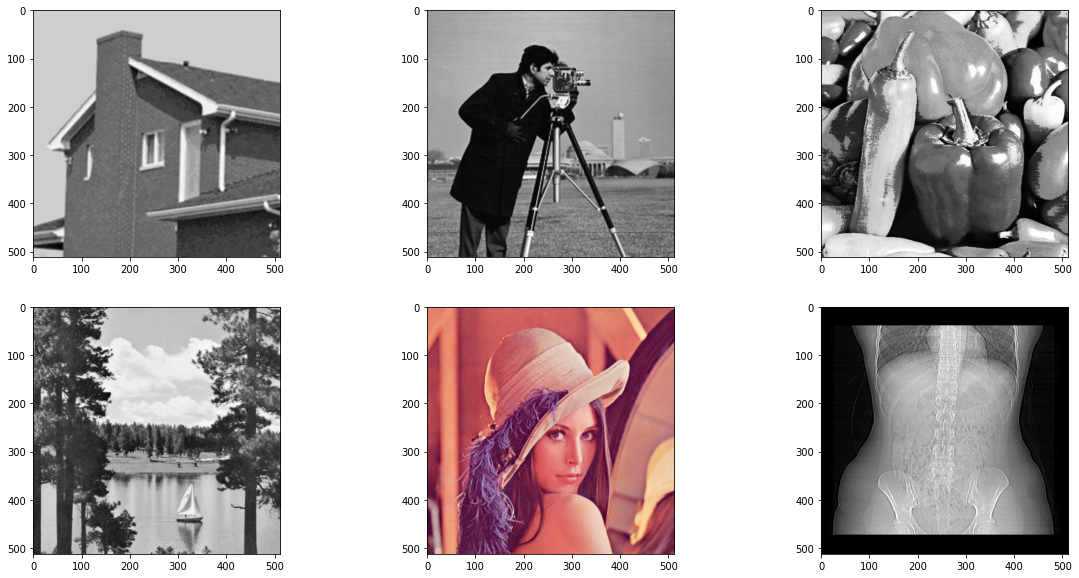

In [12]:
# Despliege de imagenes
f, axarr = plt.subplots(2,3,figsize=(20,10)) 
# use the created array to output your multiple images.
gray, alpha = cv2.split(imgSckit[0])
axarr[0,0].imshow(gray, cmap='gray');
axarr[0,1].imshow(imgSckit[1], cmap='gray');
gray, alpha = cv2.split(imgSckit[2])
axarr[0,2].imshow(gray, cmap='gray');
gray, alpha = cv2.split(imgSckit[3])
axarr[1,0].imshow(gray, cmap='gray');
axarr[1,1].imshow(imgSckit[4], cmap='gray');
axarr[1,2].imshow(imgSckit[5], cmap='gray');

## 4.1.2 Imprimir el tipo de imagen, el tamaño y el tipo de dato

In [13]:
infoPlt

,Tipo de imagen,Tamaño,Datos de imagen,Tipo de dato
house.tif,No se puede leer,None,None,None
rosa800x600.raw,No se puede leer,None,None,None
cameraman.tif,Grayscale,"(512, 512)",<class 'numpy.ndarray'>,uint8
peppers_color.tif,No se puede leer,None,None,None
lake.tif,No se puede leer,None,None,None
lena_color_512.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
Anonymized20200210.dcm,No se puede leer,None,None,None


In [14]:
infoPIL

,Tipo de imagen,Tamaño,Datos de imagen,Tipo de dato
house.tif,No se puede leer,None,None,None
rosa800x600.raw,No se puede leer,None,None,None
cameraman.tif,L,"(512, 512)",<class 'PIL.TiffImagePlugin.TiffImageFile'>,L
peppers_color.tif,No se puede leer,None,None,None
lake.tif,No se puede leer,None,None,None
lena_color_512.tif,RGB,"(512, 512)",<class 'PIL.TiffImagePlugin.TiffImageFile'>,RGB
Anonymized20200210.dcm,No se puede leer,None,None,None


In [15]:
infoCV2

,Tipo de imagen,Tamaño,Datos de imagen,Tipo de dato
house.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
rosa800x600.raw,No se puede leer,None,None,None
cameraman.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
peppers_color.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
lake.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
lena_color_512.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
Anonymized20200210.dcm,No se puede leer,None,None,None


In [16]:
infoSckit

,Tipo de imagen,Tamaño,Datos de imagen,Tipo de dato
house.tif,Gray+Alpha,"(512, 512, 2)",<class 'numpy.ndarray'>,uint8
rosa800x600.raw,No se puede leer,None,None,None
cameraman.tif,Grayscale,"(512, 512)",<class 'numpy.ndarray'>,uint8
peppers_color.tif,Gray+Alpha,"(512, 512, 2)",<class 'numpy.ndarray'>,uint8
lake.tif,Gray+Alpha,"(512, 512, 2)",<class 'numpy.ndarray'>,uint8
lena_color_512.tif,RGB,"(512, 512, 3)",<class 'numpy.ndarray'>,uint8
Anonymized20200210.dcm,Grayscale,"(512, 512)",<class 'numpy.ndarray'>,uint8
